In [1]:
import sys
sys.path.append('../.')
from utils import *
from vqls import *

# set True to reproduce the experiments
reproduce = True
# Choose the function
flab = 'elu'
#max iteration of the optimizer
MAX_ITER = 100
# Qb - step pair
pnq ={3:(3,8),
        4:(4,16)}

In [2]:
# variable setting

nq = 3
n_step = pnq[nq][1]
func_dict, func_out, lower, upper = get_func('gqs')
func = func_out[flab]
f_i = func_dict[flab]

x = np.arange(lower, upper + .03, (upper-lower)/n_step).tolist() 
xx = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
y = [func(value,f_i) for value in x]


matrix,vector,v_norm = GeneralizedVQS_System(n_step,flab,x,xx)


In [3]:
# To reproduce the results shown in the paper
settings =  {'sigmoid':{3:28,
                        4:7	},
            'elu':{ 3:12,
                    4:16},
            'sin':{ 3:46,
                    4:96},
            'relu':{3:65,
                    4:4463},
            'none': None}

if reproduce:
    params = settings[flab][nq]
else:
    params = settings['none']


## Training V($\theta$)

In [4]:
vqls_circuit = VQLS(matrix,v_norm,nq,opt='COBYLA', seed = params) 
weights = vqls_circuit.train(max_iter=MAX_ITER) 


## Quantum inner product

In [7]:
print(weights)

[-0.01135453  2.60376474  0.68391101  1.59381953  1.11173821  2.49127293
  4.42947807 -0.38985797  5.06103899]


In [41]:
qprod = qProduct(nq)
y_q=[]
for j, k in enumerate(matrix):
    y_q.append(qprod.direct_prod2(weights,k,visualize=False).item())
    


## Visualize

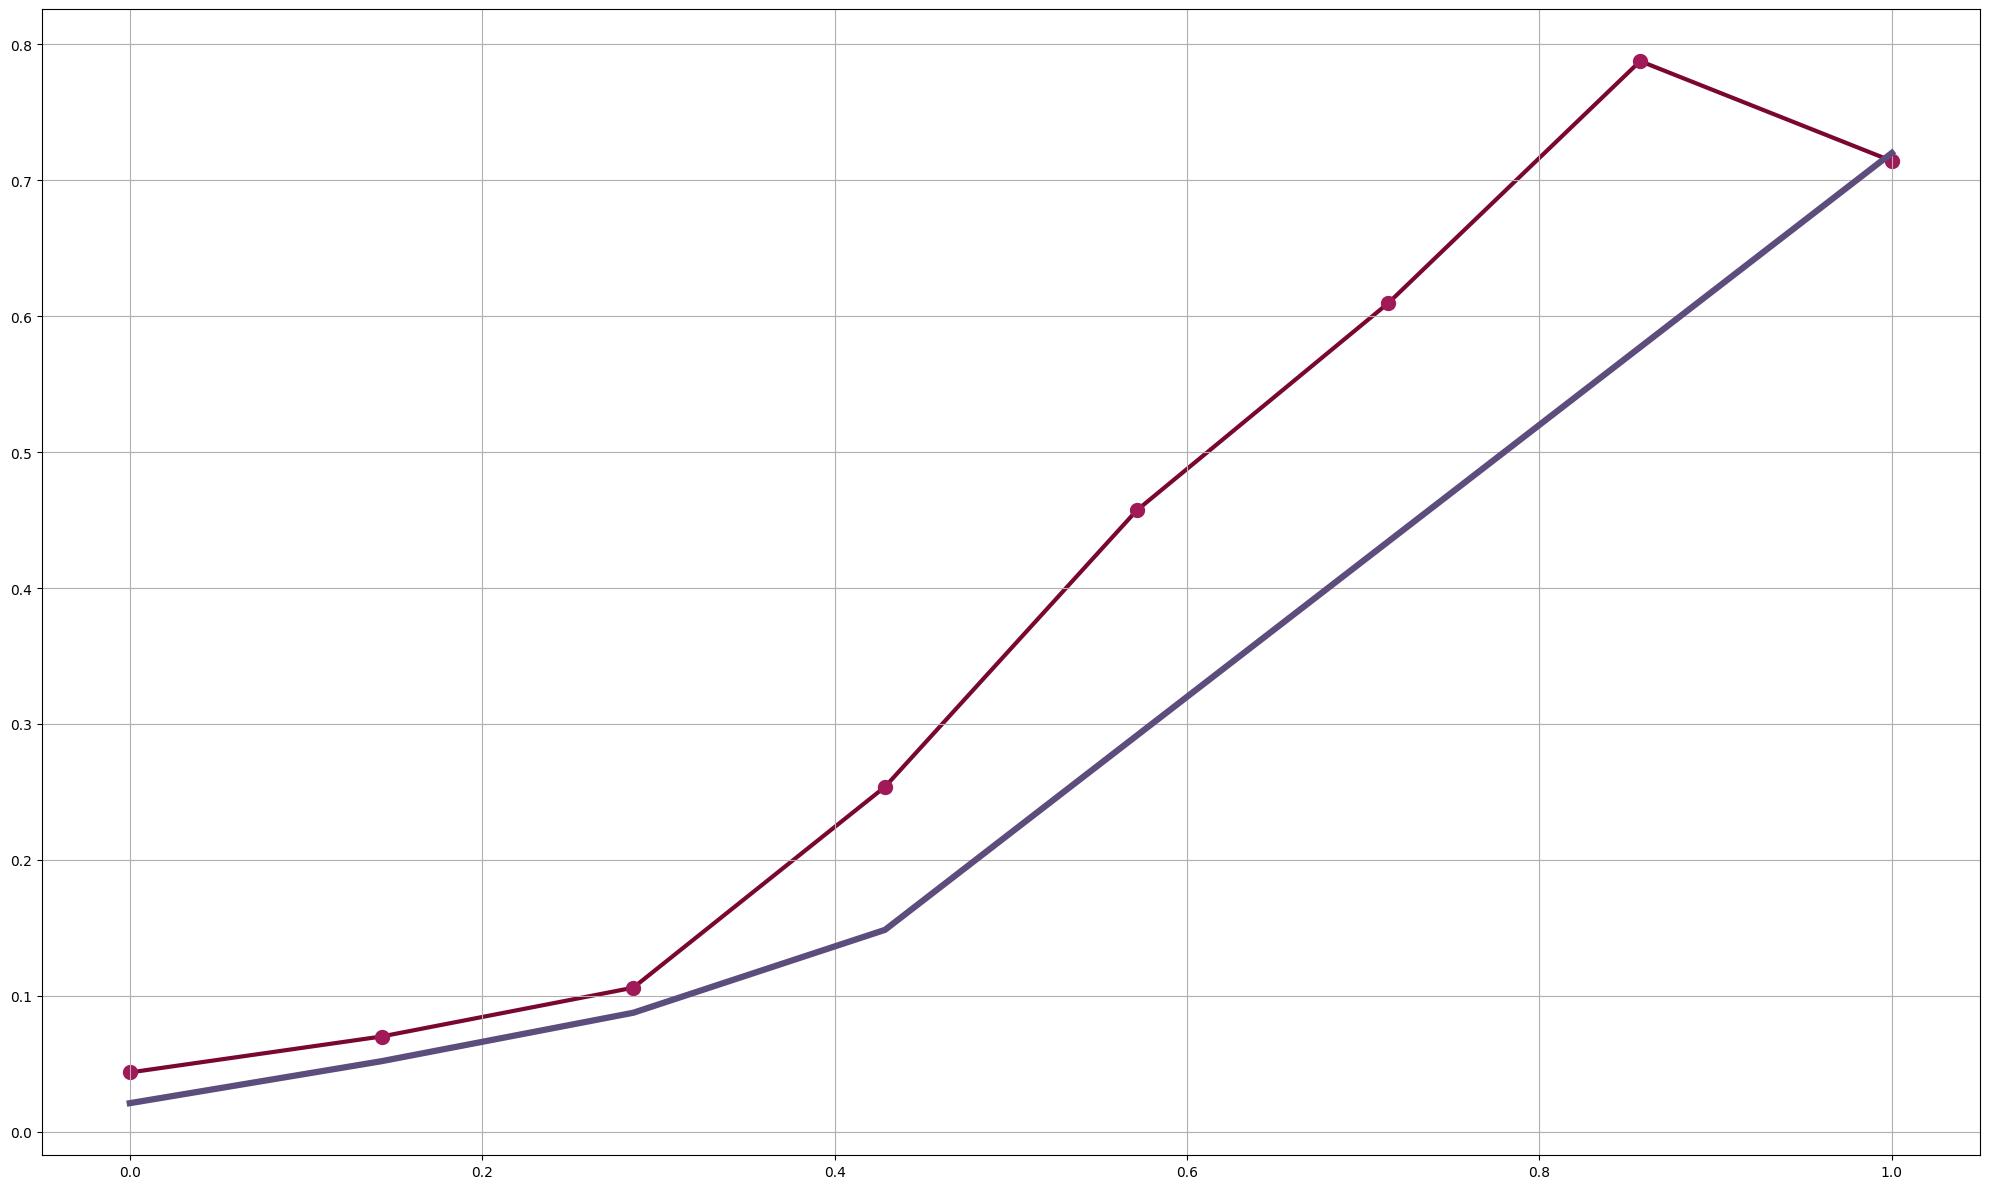

In [43]:
colorl = '#7a0632'
colors = '#a01a58'
xx = np.linspace(lower, upper, n_step).tolist() ##inputs sampling in the interval 0,1

y = [func(value,f_i) for value in xx]

fig = plt.figure(tight_layout = False, figsize=(20,12))
plt.grid(zorder = -3)
plt.plot(xx,y,  label=f"Original function scaled {n_step}", color = '#5c4d7d',linewidth=4.5)


plt.plot(xx,y_q, color=colorl, zorder= -1, lw=3)
plt.scatter(xx,(y_q), color=colors, linewidths=5)

plt.show()